Sabrina Shafwa

2106632756

In [2]:
# Import library
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Memuat dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# Normalisasi data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Label encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:

# Membuat model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=64)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 94ms/step - accuracy: 0.3366 - loss: 1.8054 - val_accuracy: 0.5163 - val_loss: 1.3332
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 89ms/step - accuracy: 0.5566 - loss: 1.2384 - val_accuracy: 0.5880 - val_loss: 1.1430
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 90ms/step - accuracy: 0.6122 - loss: 1.0982 - val_accuracy: 0.6450 - val_loss: 1.0145
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.6588 - loss: 0.9711 - val_accuracy: 0.6701 - val_loss: 0.9507
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.6911 - loss: 0.8936 - val_accuracy: 0.6633 - val_loss: 0.9518
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 94ms/step - accuracy: 0.7103 - loss: 0.8320 - val_accuracy: 0.6902 - val_loss: 0.8851
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.7284 - loss: 0.7806 - val_accuracy: 0.6977 - val_loss: 0.8948
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step - accuracy: 0.7451 - loss: 0.7243 - 

In [6]:
# Evaluasi model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Akurasi pada data testing: {test_acc:.2f}")

313/313 - 5s - 16ms/step - accuracy: 0.7057 - loss: 0.8771
Akurasi pada data testing: 0.71


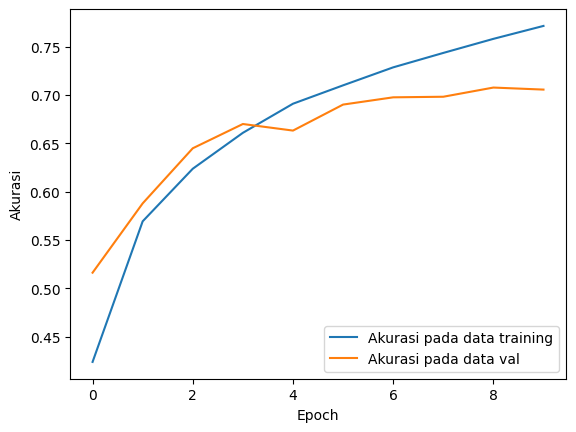

In [7]:
# Visualisasi hasil
plt.plot(history.history['accuracy'], label='Akurasi pada data training')
plt.plot(history.history['val_accuracy'], label='Akurasi pada data val')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(loc='lower right')
plt.show()